In [1]:
!pip install tensorflow==2.16.1

  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)


In [2]:
import tensorflow as tf
# 2.10.0

2024-06-09 22:21:56.916857: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 22:21:56.923704: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 22:22:01.261732: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
tf.__version__

'2.16.1'

In [4]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from IPython import display

In [22]:
#Wczytanie zdjęć treningowych (
images_train = []
labels_train = []

num_labels = 24

size = 70

noise_dim = 100



for i in range(1, 11):
    
    for j in range(1, size+1):

        im = Image.open(r'./Baza_zdjec_konwersja_64x64/s'+str(i)+'/'+str(j)+'.png')
        arr_im = np.array(im)
        arr_im = (arr_im - 127.5) / 127.5  # Normalize the images to [-1, 1]
        arr_im = arr_im.astype(np.float32)
        images_train.append(arr_im)
        labels_train.append(i-1) 


for i in range(27, 41):
    
    for j in range(1, size+1):

        im = Image.open(r'./Baza_zdjec_konwersja_64x64/s'+str(i)+'/'+str(j)+'.png')
        arr_im = np.array(im)
        arr_im = (arr_im - 127.5) / 127.5  # Normalize the images to [-1, 1]
        arr_im = arr_im.astype(np.float32)
        images_train.append(arr_im)
        labels_train.append(i-17) 


print(len(images_train))


train_labels = tf.one_hot(labels_train, num_labels)
train_labels = tf.reshape(train_labels, (train_labels.shape[0], train_labels.shape[1]))



1680


In [24]:
def generate_new(model_path, label):
    model = tf.keras.models.load_model(model_path)
    noise_dim = 100
    
    num_samples = 16
    num_labels = 24

    label_print = label

    half = (num_labels-1)/2
    label = np.array(label)
    label = ((label - half)/half).astype(np.float32)

    print(label)
    
    labels = [[label] for _ in range(num_samples)]
    
    print(labels)
    
    labels = tf.convert_to_tensor(labels, dtype=tf.float32)
    
    noise = tf.random.normal([num_samples, noise_dim])


    predictions = model([noise, labels], training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    plt.show()

-0.13043478
[[-0.13043478], [-0.13043478], [-0.13043478], [-0.13043478], [-0.13043478], [-0.13043478], [-0.13043478], [-0.13043478], [-0.13043478], [-0.13043478], [-0.13043478], [-0.13043478], [-0.13043478], [-0.13043478], [-0.13043478], [-0.13043478]]


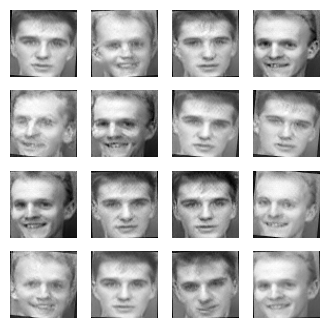

In [34]:
generate_new('./Generator/generator_model_epoch_1600.h5', 10)

In [6]:
def generate_and_save(model_path, label):

    model = tf.keras.models.load_model(model_path)
    
    noise_dim = 100
    
    num_samples = 16

    label_print = label

    half = (num_labels-1)/2
    label = np.array(label)
    label = ((label - half)/half).astype(np.float32)

    print(label)
    
    labels = [[label] for _ in range(num_samples)]
    labels = tf.convert_to_tensor(labels, dtype=tf.float32)
    
    noise = tf.random.normal([num_samples, noise_dim])




    predictions = model([noise, labels], training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    #plt.savefig(f'images/image_at_epoch_{epoch+1:04d}_label_{label_print}.png')
    plt.show()

In [7]:
generate_and_save('./Generator/generator_model_epoch_6000.h5', 9)

ValueError: Unrecognized keyword arguments: ['batch_shape']

In [9]:
inputs = tf.keras.Input(shape=(100,))


In [10]:
model = tf.keras.models.load_model('./Generator/generator_model_epoch_6000.h5')


ValueError: Unrecognized keyword arguments: ['batch_shape']